In [1]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
df_array = iris.data
col_names = iris.feature_names
df_pd = pd.DataFrame(df_array , columns = col_names , index = None)
df_pd.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


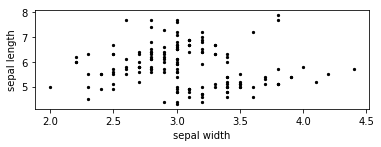

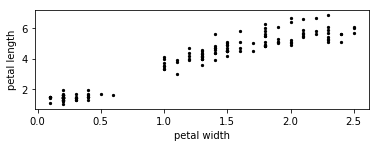

In [3]:
plt.figure(1)
plt.subplot(211)
plt.scatter( df_pd["sepal width (cm)"],df_pd["sepal length (cm)"] , c = "black" ,s = 5)
plt.xlabel("sepal width")
plt.ylabel("sepal length")
plt.show()
plt.figure(1)
plt.subplot(212)
plt.scatter(df_pd['petal width (cm)'] , df_pd['petal length (cm)'] , c = "black" , s = 5 )
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.show()

<h3>Random initialization of Cluster Centroids.</h3>

In [4]:
def cluster_centroids_random_initializations(x , k = 2):
    c_x = np.random.uniform(np.min(x) , np.max(x)  , size = k )
    c = np.array(c_x).T
    
    return c

def random_clusters( x , k ):
    length = len(x)
    
    c = pd.DataFrame()
    
    centroid = cluster_centroids_random_initializations(x , k = k)
    centroid = np.array(sorted(centroid))
      
    ind = []
    ccc = []
    for i in range(length):
        distance =  [np.linalg.norm(x[i] - c)**2 for c in centroid]
        min_dist = np.min(distance)
        ind.append(i)
        ccc.append(np.linalg.norm(centroid[distance.index(min_dist)])) 
    c["index"] = ind
    c["closest_cc"] = ccc
    return c , centroid

<h3>Creating different Clusters using cluster centroids.</h3>

In [5]:
def clusters( x  , centroids):
    length = len(x)
    
    c = pd.DataFrame()

    centroid = centroids
        
    ind = []
    ccc = []
    label = []
    
    for i in range(length):
        distance =  [np.linalg.norm(x[i] - c)**2 for c in centroid]
        min_dist = np.min(distance)
        ind.append(i)
        ccc.append(np.linalg.norm(centroid[distance.index(min_dist)])) 
        label.append(distance.index(min_dist))
    c["index"] = ind
    c["closest_cc"] = ccc
    c["label"] = label
    return c , centroid

<h3>Moving Centroids.</h3>

In [6]:
def moving_centroids(x ,clusters,centroids):
    clusters["x"] = x
    new_centroids = []
    for i in centroids:
        new_centroids.append(np.mean(clusters["x"][clusters["closest_cc"] == i]))
    return np.array(new_centroids).T

<h2>K means</h2>

In [7]:
def kmean(x ,k = 2 , n_iters = 100 , randm_clust_iters = 10):
    outputs = pd.DataFrame()
    pred_y = []
    for col in x.columns.values:
        for i in range(randm_clust_iters):
            clust , centroids =  random_clusters(x[col] , k = k) 
            
        for iters in range(n_iters):
            
            new_centroids = moving_centroids(x[col] , clust , centroids )
            if sum(new_centroids) == sum(centroids):
                break
            centroids =  new_centroids
            clust , c = clusters(x[col] , centroids)
        outputs[col] = clust["label"]
    for i in range(len(outputs)):
        pred_y.append(pd.DataFrame(np.array(outputs)[i].tolist()).mode()[0][0])
    return pred_y

<h3>Output</h3>

In [8]:
pred_y = kmean(df_pd , k = 3 , n_iters = 50 , randm_clust_iters=20)

<h3>Checking ouput or predicted clusters with original dependent variable of iris data set.</h3>

In [9]:
print("confusion matrix :")
print(confusion_matrix(iris.target , pred_y))
print("accuracy score :")
print(accuracy_score(iris.target , pred_y))

confusion matrix :
[[50  0  0]
 [ 5 45  0]
 [ 1 15 34]]
accuracy score :
0.86


In [10]:
df_pd["predict_y"] = pred_y
df_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict_y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


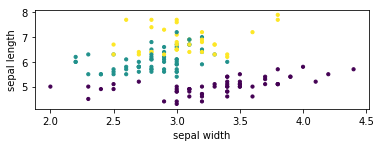

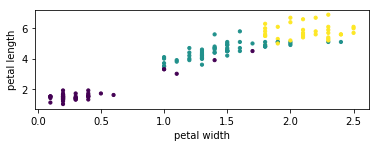

In [11]:
plt.figure(1)
plt.subplot(211)
plt.scatter( df_pd["sepal width (cm)"],df_pd["sepal length (cm)"] ,
                   c = df_pd["predict_y"] ,s = 10)
plt.xlabel("sepal width")
plt.ylabel("sepal length")
plt.show()

plt.figure(1)
plt.subplot(212)
plt.scatter(df_pd['petal width (cm)'] , df_pd['petal length (cm)'] , 
                  c = df_pd["predict_y"] , s = 10 )
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.show()

<h3>K means using sklearn</h3>

In [13]:
df_ = pd.DataFrame(df_array , columns = col_names , index = None)
from sklearn.cluster import KMeans
algo = (KMeans(n_clusters=3))
algo.fit(df_)
pred_algo = algo.predict(df_)
print("confusion matrix : ")
print(confusion_matrix(iris.target , pred_algo))
print("accuracy score : ")
print(accuracy_score(iris.target , pred_algo))

confusion matrix : 
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]
accuracy score : 
0.24
